In [1]:
data_path = "/home/hoangbaoan1901/Documents/information-system_UET/sem5/cshttt/explainable_active_learning_xgb/xal4food/log"

In [2]:
import os

# List all files in the data_path directory
files = os.listdir(data_path)

# Filter out the .pkl files
pkl_files = [file for file in files if file.endswith('.pkl')]

print(pkl_files)

['1_0_30_cluster_based_user2_Uncertainty_False.pkl', '1_0_30_cluster_based_sportive_user1_UncertaintyClustered_False.pkl', '1_0_30_cluster_based_unhealthy_user3_Uncertainty_False.pkl', 'KMedoidsSampling_init_1_0_0.001_30.pkl', '1_0_30_cluster_based_elder_user2_MostUncertainCluster_False.pkl', '1_0_30_cluster_based_user1_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_random_UncertaintyClustered_False.pkl', '1_0_30_cluster_based_random_Uncertainty_False.pkl', '1_0_30_cluster_based_sportive_user1_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_user2_UncertaintyClustered_False.pkl', '1_0_30_cluster_based_unhealthy_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_elder_user2_MostUncertainCluster_True.pkl', 'KMedoidsSampling_target_2_0.001_100.pkl', '1_0_30_cluster_based_unhealthy_user3_UncertaintyClustered_False.pkl', 'Random_init_1_0_0.001_30.pkl', '1_0_30_cluster_based_vegan_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user3_MostUncertainCluster_True.pkl', '1

In [3]:
true_files = [file for file in pkl_files if 'True' in file]
print(true_files)
print(len(true_files))

false_files = [file for file in pkl_files if 'False' in file]
print(false_files)
print(len(false_files))

['1_0_30_cluster_based_user1_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_sportive_user1_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_unhealthy_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_elder_user2_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_vegan_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user3_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_sportive_user3_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_random_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user1_ClusteredUncertainty_True.pkl', '1_0_30_cluster_based_random_ClusteredUncertainty_True.pkl', '1_0_30_cluster_based_unhealthy_user3_ClusteredUncertainty_True.pkl', '1_0_30_cluster_based_random_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_user2_UncertaintyClustered_True.pkl', '1_0_30_cluster_based_random_Uncertainty_True.pkl', '1_0_30_cluster_based_user3_UncertaintyClustered_True.pkl', '1_

In [4]:
strategy_names = ['Uncertainty', 'MostUncertainCluster', 'ClusteredUncertainty', 'UncertaintyClustered']
true_strategy_files = []

for strategy_name in strategy_names:
	files_list = []
	for file in true_files:
		if file.split('.')[0].split('_')[-2] == strategy_name:
			files_list.append(file)
	true_strategy_files.append(files_list)

for files_list in true_strategy_files:
	print(files_list)
	print(len(files_list))

false_strategy_files = []
for strategy_name in strategy_names:
	files_list = []
	for file in false_files:
		if file.split('.')[0].split('_')[-2] == strategy_name:
			files_list.append(file)
	false_strategy_files.append(files_list)


['1_0_30_cluster_based_unhealthy_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_vegan_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_user1_Uncertainty_True.pkl', '1_0_30_cluster_based_random_Uncertainty_True.pkl', '1_0_30_cluster_based_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_elder_user2_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user3_Uncertainty_True.pkl', '1_0_30_cluster_based_unhealthy_user3_Uncertainty_True.pkl', '1_0_30_cluster_based_user3_Uncertainty_True.pkl', '1_0_30_cluster_based_sportive_user1_Uncertainty_True.pkl']
10
['1_0_30_cluster_based_elder_user2_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_sportive_user3_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_random_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_vegan_user2_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_user1_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_unhealthy_user3_MostUncertainCluster_True.pkl', '1_0_30_cluster_based_unhealthy_user1_Most

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# format: f1, mcc
true_f1_strategy = []
true_mcc_strategy = []
for files_list in true_strategy_files:
	f1_list = []
	mcc_list = []
	for file in files_list:
		with open(os.path.join(data_path, file), 'rb') as f:
			data = pickle.load(f)
			f1_list.append([data.scores[i][0] for i in range(len(data.scores))])
			print(f1_list)
			mcc_list.append([data.scores[i][1] for i in range(len(data.scores))])
			print(mcc_list)
	true_f1_strategy.append(f1_list)
	true_mcc_strategy.append(mcc_list)

false_f1_strategy = []
false_mcc_strategy = []

for files_list in false_strategy_files:
	f1_list = []
	mcc_list = []
	for file in files_list:
		with open(os.path.join(data_path, file), 'rb') as f:
			data = pickle.load(f)
			f1_list.append([data.scores[i][0] for i in range(len(data.scores))])
			mcc_list.append([data.scores[i][1] for i in range(len(data.scores))])
	false_f1_strategy.append(f1_list)
	false_mcc_strategy.append(mcc_list)


[[0.7753289081442029, 0.7899073739925419, 0.7995634851183429, 0.8053095501052324, 0.8065288496483315, 0.80644281789392, 0.8084979437021884, 0.814839421768343, 0.8192849193400252, 0.8223440509705141, 0.8245525378712202, 0.8298960528496673, 0.8371313672922251, 0.8343564212866741, 0.8337999926638708, 0.8341787350829474, 0.845710275454705, 0.846549023221526, 0.8439260419345036, 0.8498646003071404, 0.8510997916184302, 0.8502104539041823, 0.8470318270368467, 0.8436476133637016, 0.8459082750063246, 0.8444676535953268, 0.8463524396020843, 0.8477346924395801, 0.8513156528660584, 0.8532646088183504, 0.8507433691019004, 0.8511049252968244, 0.850425416364953, 0.8489276774237197, 0.8497887742181285, 0.8538777722571028, 0.8538922561202722, 0.8560015477585952, 0.853741067434418, 0.8533792822001043, 0.8533062565600329, 0.8535753778105418, 0.8552409568935629, 0.856368880118632, 0.856742126554694, 0.857257078355752, 0.8558879588961631, 0.855505123765851, 0.8529207926607228, 0.8511298704352529, 0.8522142

In [6]:
true_f1_average = []

for i in range(4):
	f1_strat_avg = []
	for j in range (52):
		s = 0
		for k in range(10):
			try:
				s += true_f1_strategy[i][k][j]
			except IndexError:
				print(i, j, k)
				raise IndexError
		s /= 10
		f1_strat_avg.append(s)
	true_f1_average.append(f1_strat_avg)

true_mcc_average = []

for i in range(4):
	mcc_strat_avg = []
	for j in range (52):
		s = 0
		for k in range(10):
			s += true_mcc_strategy[i][k][j]
		s /= 10
		mcc_strat_avg.append(s)
	true_mcc_average.append(mcc_strat_avg)


false_f1_average = []

for i in range(4):
	f1_strat_avg = []
	for j in range (52):
		s = 0
		for k in range(10):
			try:
				s += false_f1_strategy[i][k][j]
			except IndexError:
				print(i, j, k)
				raise IndexError
		s /= 10
		f1_strat_avg.append(s)
	false_f1_average.append(f1_strat_avg)

false_mcc_average = []

for i in range(4):
	mcc_strat_avg = []
	for j in range (52):
		s = 0
		for k in range(10):
			s += false_mcc_strategy[i][k][j]
		s /= 10
		mcc_strat_avg.append(s)
	false_mcc_average.append(mcc_strat_avg)

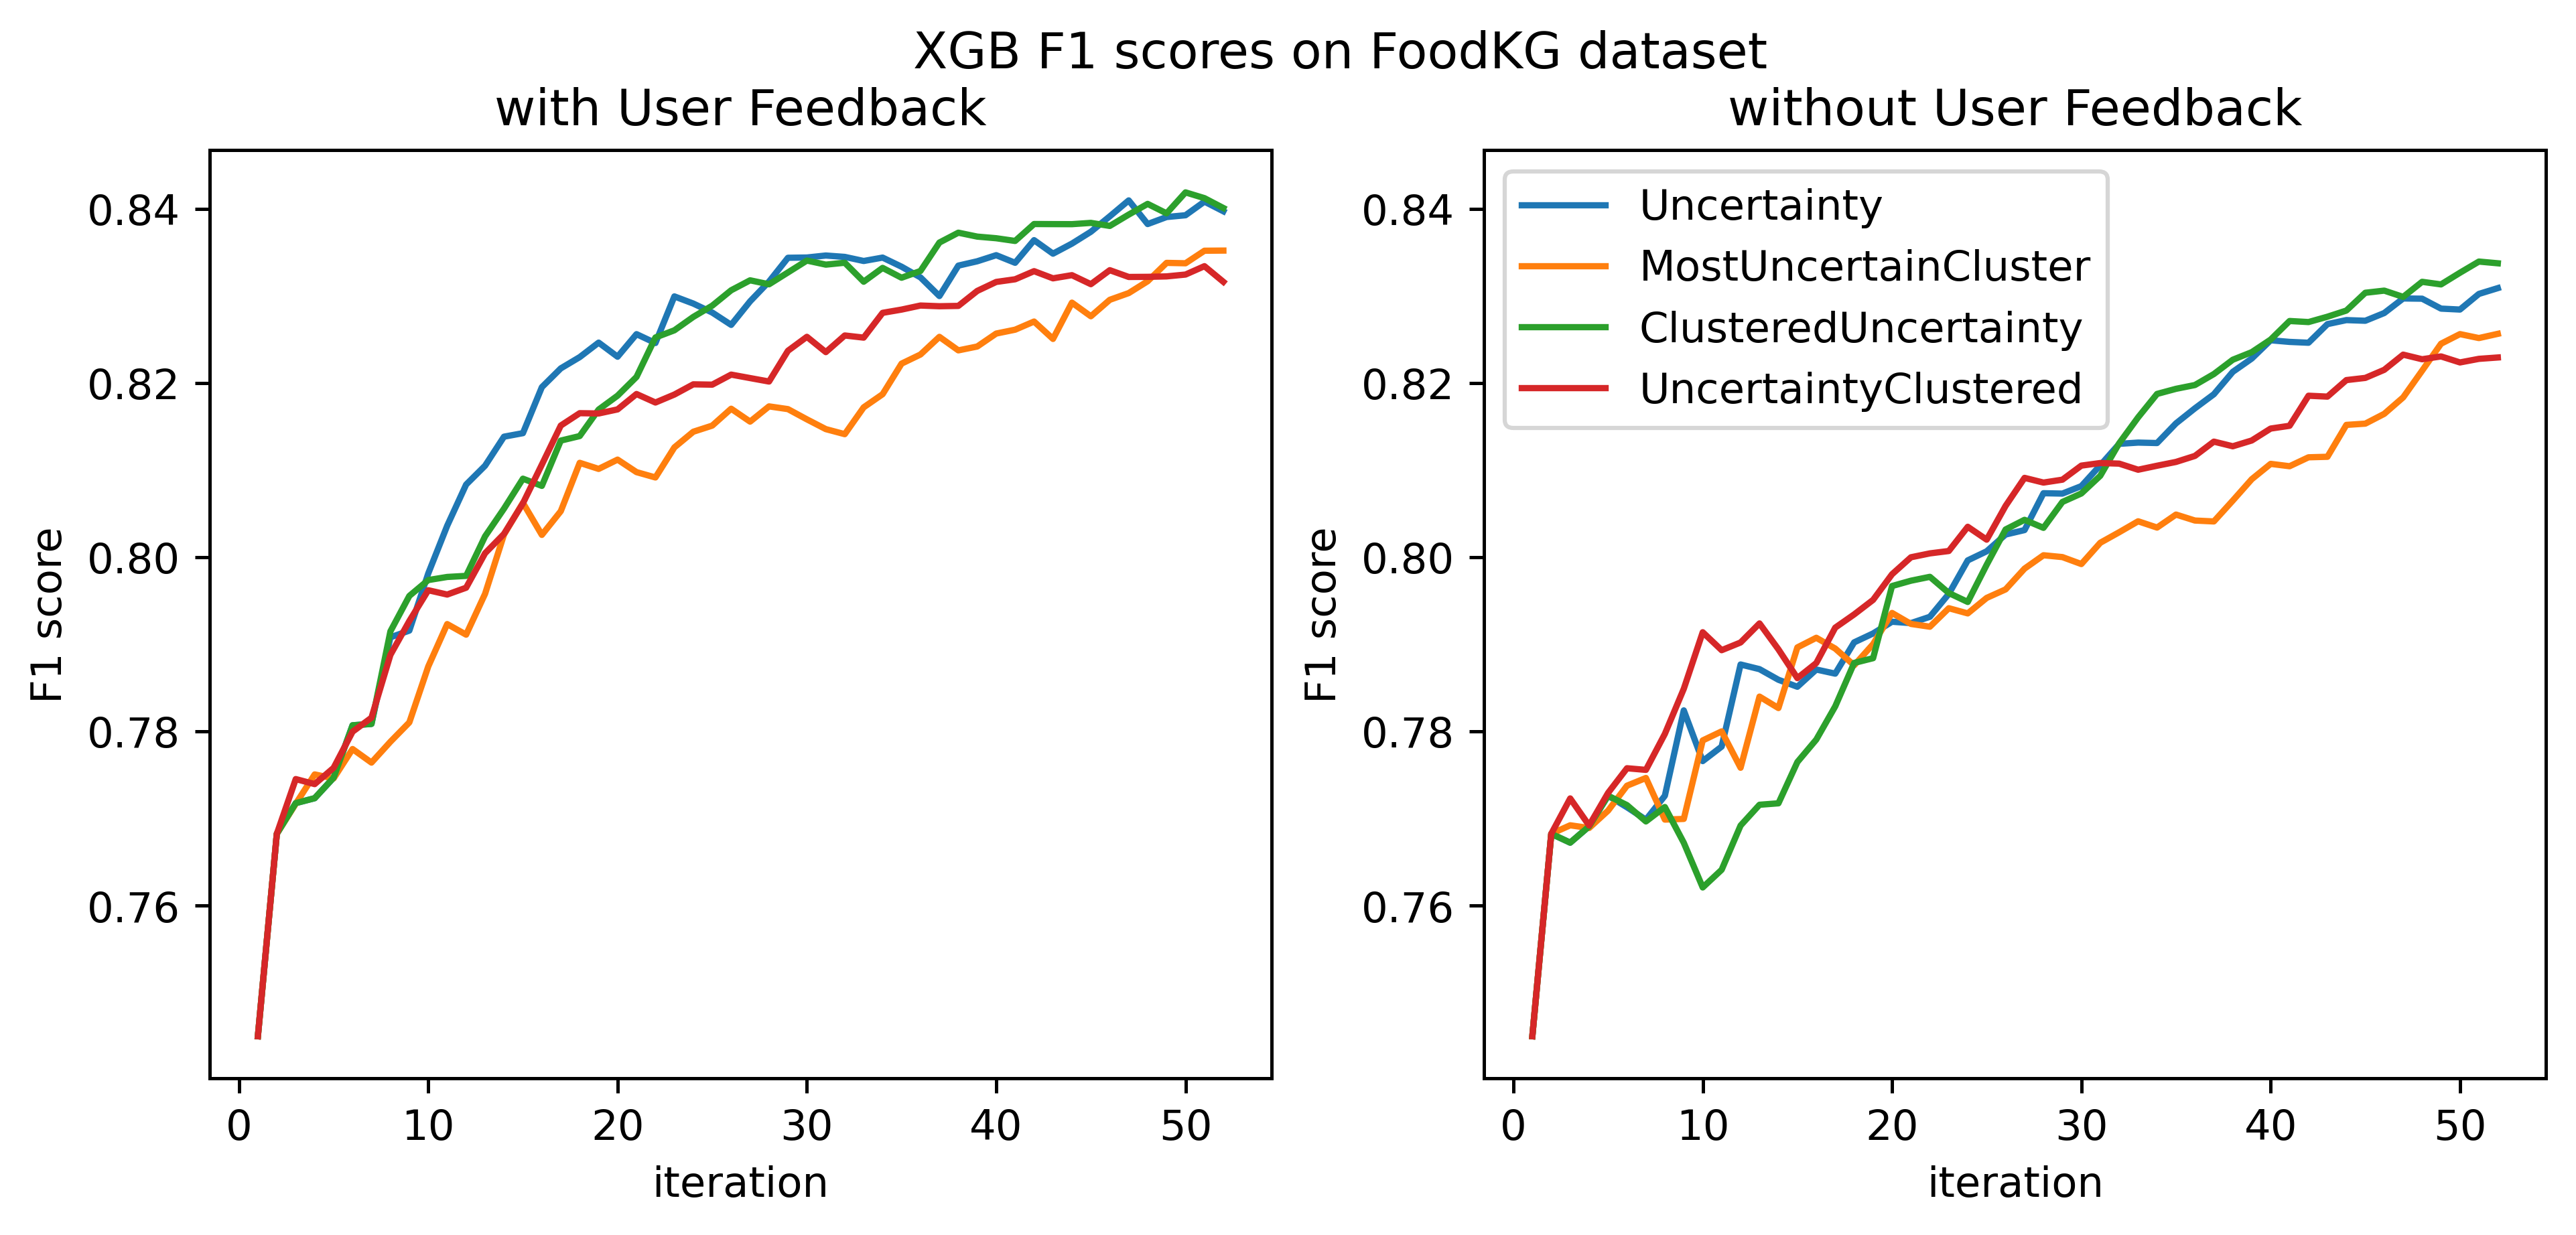

In [7]:
# Plot the average F1 score of the true and false labels
# Create sublot for 2 plots
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=450)
fig.suptitle('XGB F1 scores on FoodKG dataset')
x = np.arange(1, 53)
for i in range(4):
	axs[0].plot(x, true_f1_average[i], label=strategy_names[i])
	axs[1].plot(x, false_f1_average[i], label=strategy_names[i])
axs[0].set_title('with User Feedback')
axs[1].set_title('without User Feedback')
axs[0].set_xlabel('iteration')
axs[1].set_xlabel('iteration')
axs[0].set_ylabel('F1 score')
axs[1].set_ylabel('F1 score')

axs[1].tick_params(axis='y', labelleft=True)
plt.legend()

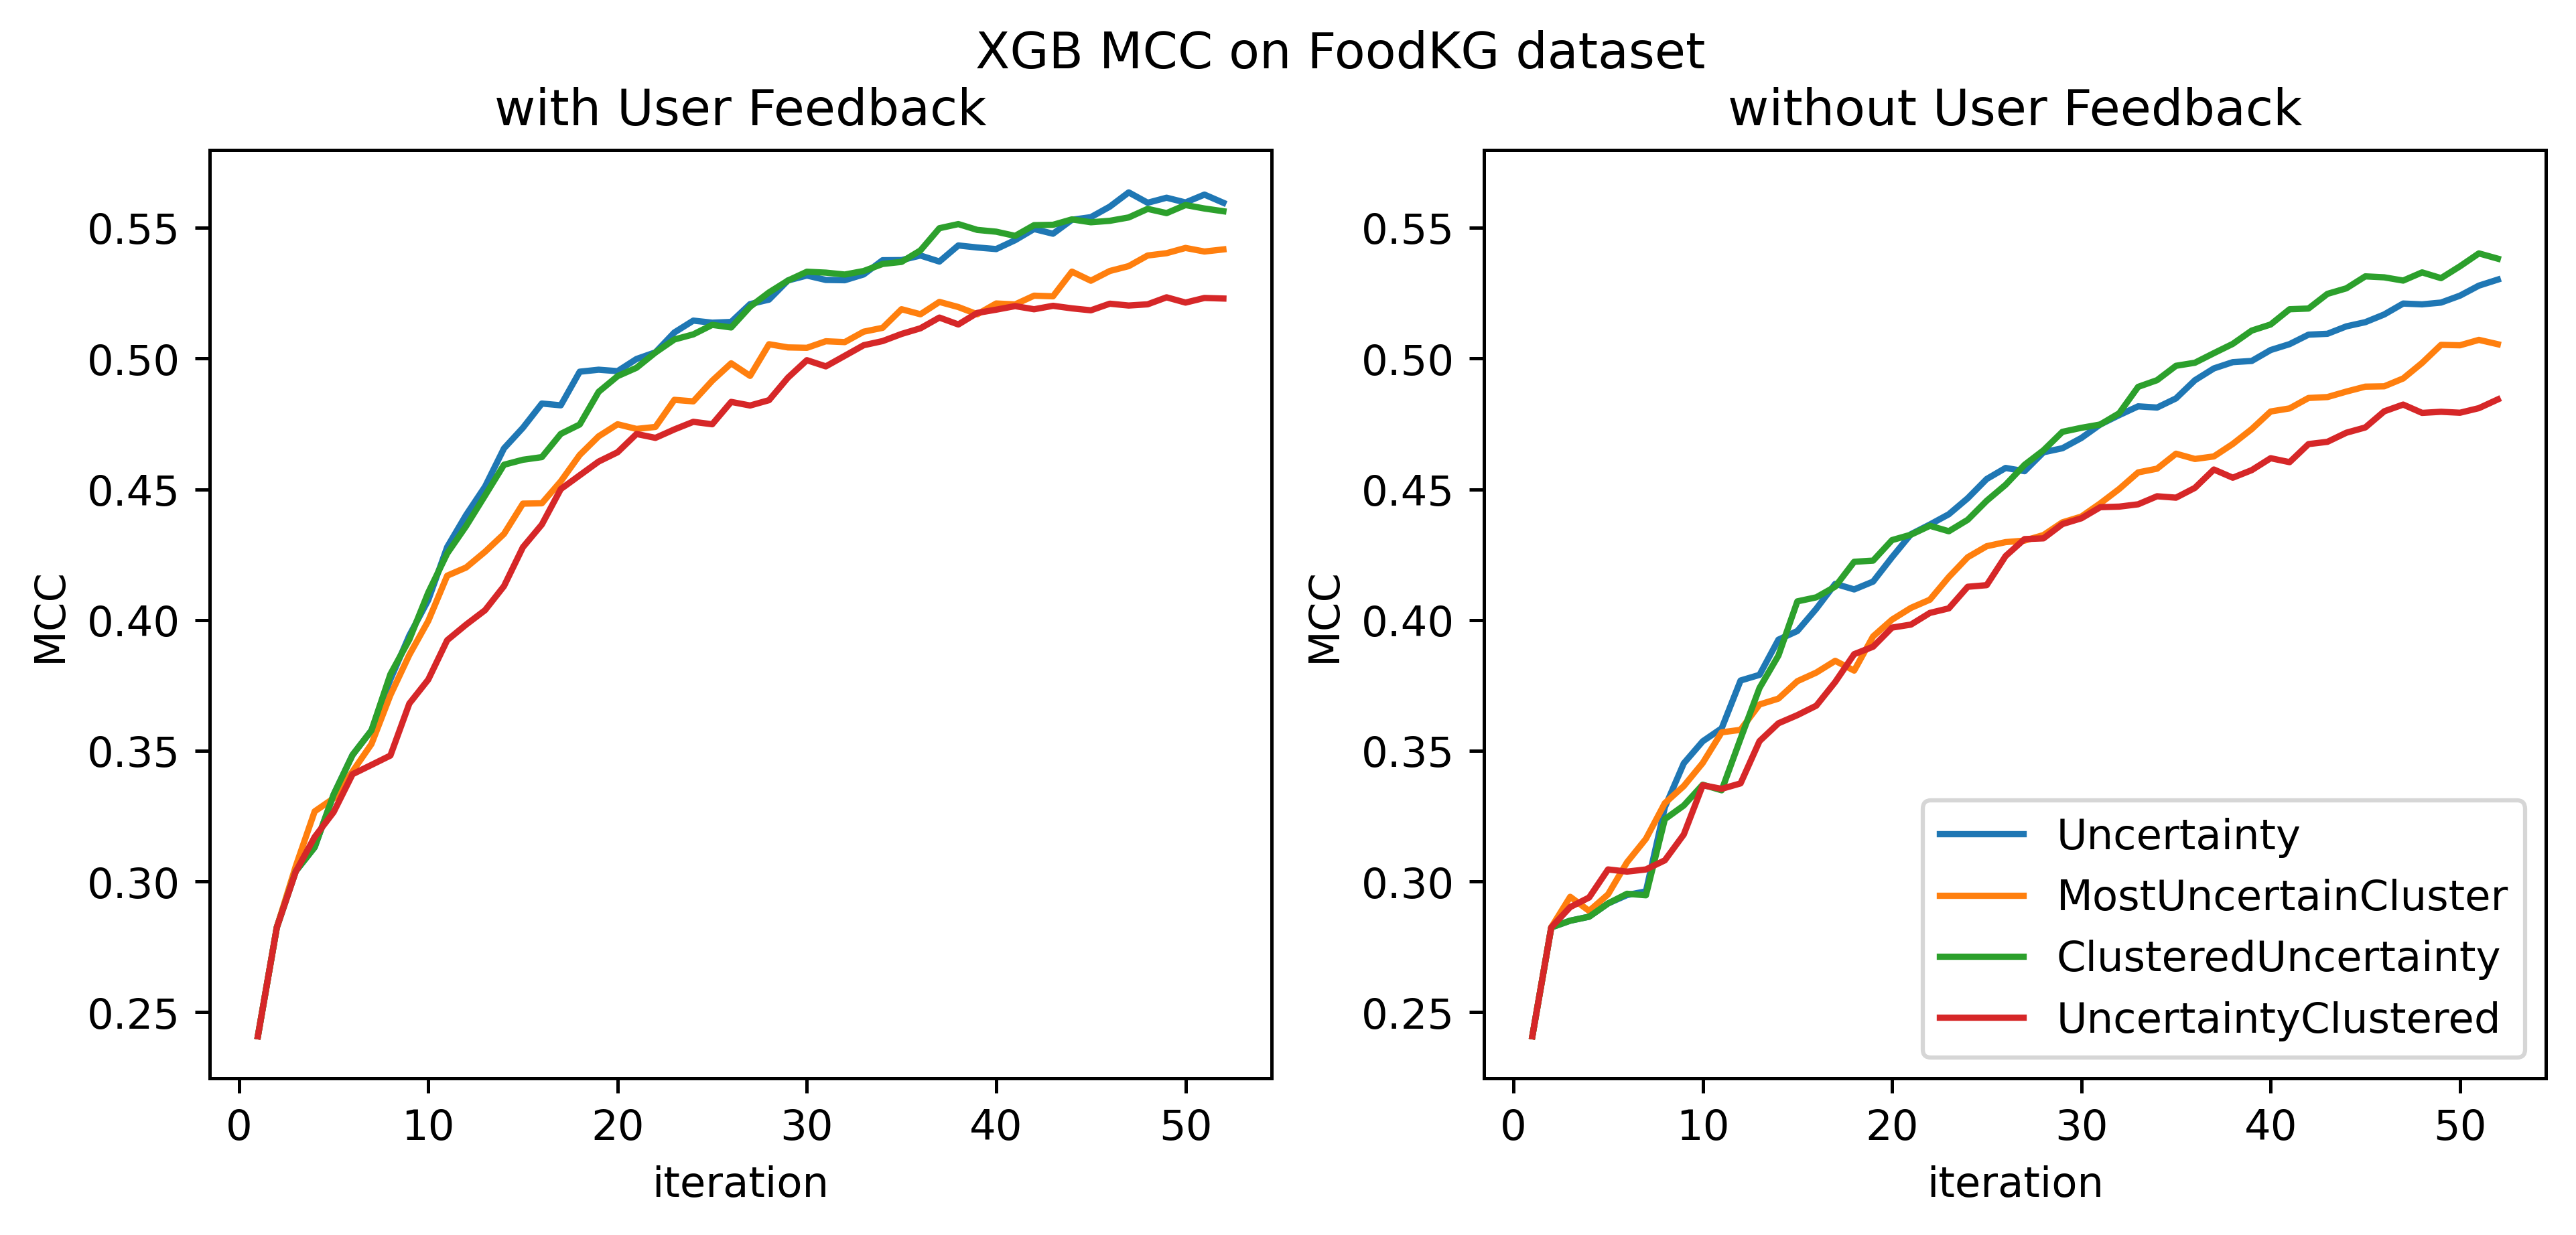

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=450)
fig.suptitle('XGB MCC on FoodKG dataset')
x = np.arange(1, 53)
for i in range(4):
	axs[0].plot(x, true_mcc_average[i], label=strategy_names[i])
	axs[1].plot(x, false_mcc_average[i], label=strategy_names[i])
axs[0].set_title('with User Feedback')
axs[1].set_title('without User Feedback')
axs[0].set_xlabel('iteration')
axs[1].set_xlabel('iteration')
axs[0].set_ylabel('MCC')
axs[1].set_ylabel('MCC')
# Show second y-axis
axs[1].tick_params(axis='y', labelleft=True)
plt.legend()

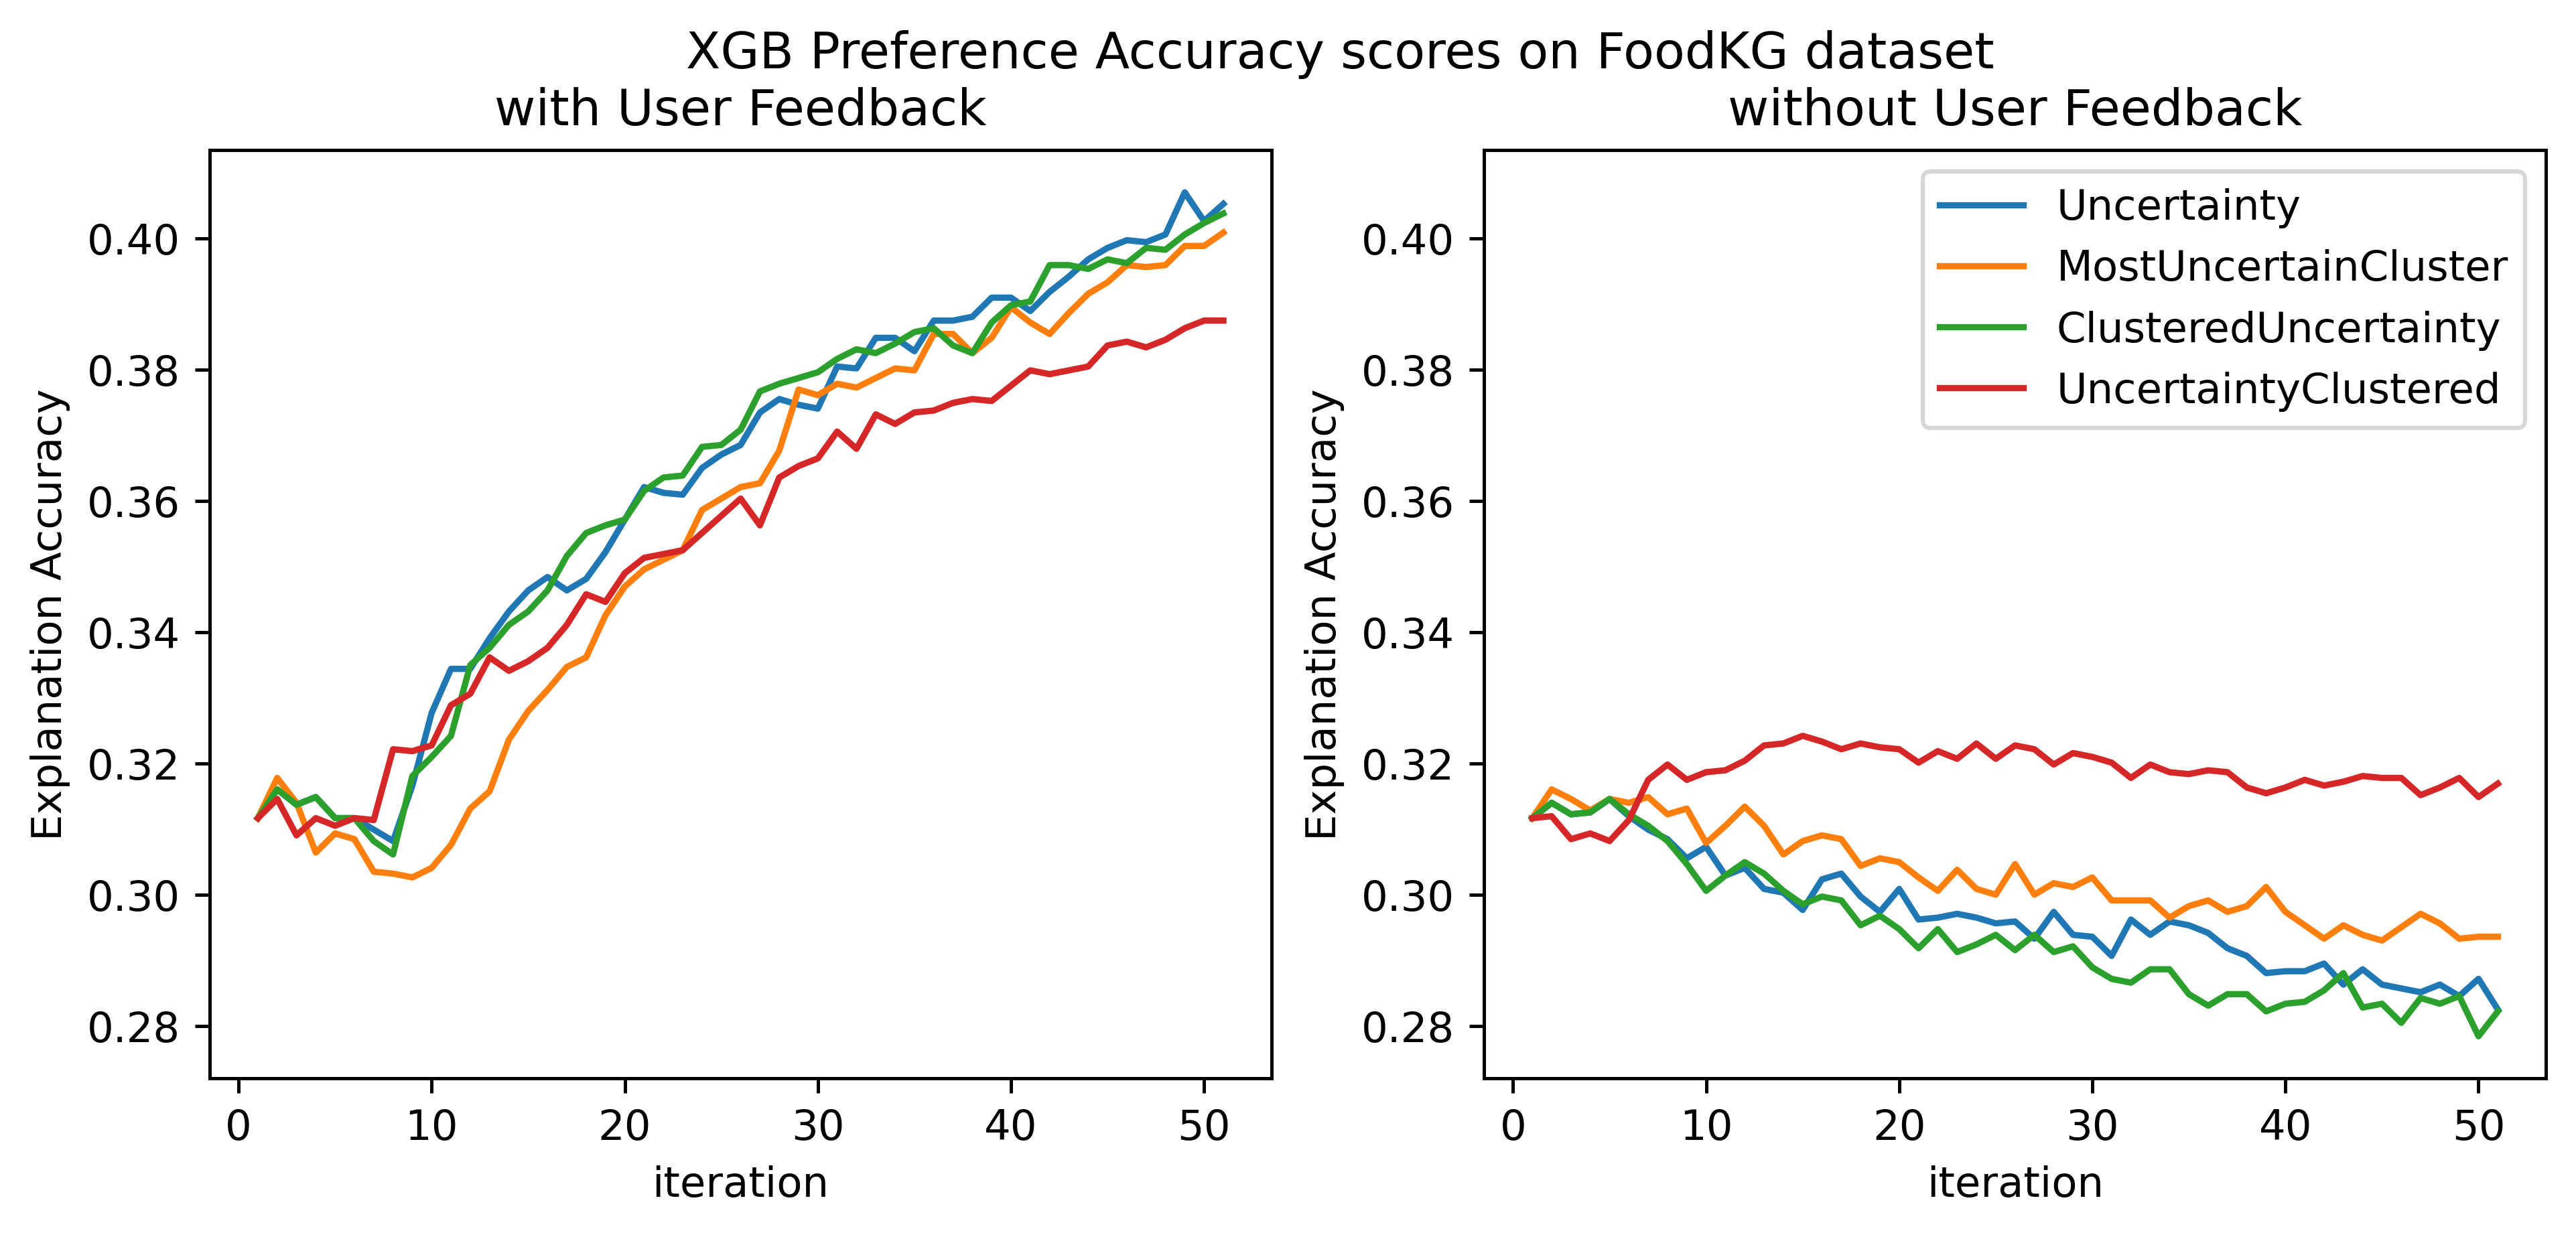

In [9]:
true_pref_acc_strategy = []
for files_list in true_strategy_files:
	pref_acc_list = []
	for file in files_list:
		with open(os.path.join(data_path, file), 'rb') as f:
			data = pickle.load(f)
			pref_acc_list.append([data.pref_acc[i] for i in range(len(data.pref_acc))])
	true_pref_acc_strategy.append(pref_acc_list)

false_pref_acc_strategy = []
for files_list in false_strategy_files:
	pref_acc_list = []
	for file in files_list:
		with open(os.path.join(data_path, file), 'rb') as f:
			data = pickle.load(f)
			pref_acc_list.append([data.pref_acc[i] for i in range(len(data.pref_acc))])
	false_pref_acc_strategy.append(pref_acc_list)

true_pref_acc_average = []

for i in range(4):
	pref_acc_strat_avg = []
	for j in range (51):
		s = 0
		for k in range(10):
			try:
				s += true_pref_acc_strategy[i][k][j]
			except IndexError:
				print(i, j, k)
				raise IndexError
		s /= 10
		pref_acc_strat_avg.append(s)
	true_pref_acc_average.append(pref_acc_strat_avg)

false_pref_acc_average = []

for i in range(4):
	pref_acc_strat_avg = []
	for j in range (51):
		s = 0
		for k in range(10):
			try:
				s += false_pref_acc_strategy[i][k][j]
			except IndexError:
				print(i, j, k)
				raise IndexError
		s /= 10
		pref_acc_strat_avg.append(s)
	false_pref_acc_average.append(pref_acc_strat_avg)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=450)
fig.suptitle('XGB Preference Accuracy scores on FoodKG dataset')
x = np.arange(1, 52)
for i in range(4):
	axs[0].plot(x, true_pref_acc_average[i], label=strategy_names[i])
	axs[1].plot(x, false_pref_acc_average[i], label=strategy_names[i])
axs[0].set_title('with User Feedback')
axs[1].set_title('without User Feedback')
axs[0].set_xlabel('iteration')
axs[1].set_xlabel('iteration')
axs[0].set_ylabel('Explanation Accuracy')
axs[1].set_ylabel('Explanation Accuracy')

axs[1].tick_params(axis='y', labelleft=True)
plt.legend()